<a href="https://colab.research.google.com/github/crypto10pi/Ejemplos/blob/main/CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

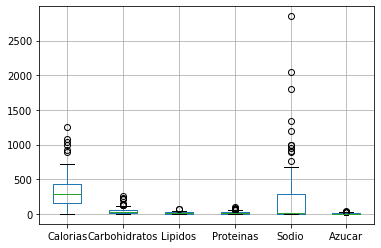

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url="/content/ModeloRegresionTec.csv"
df_raw=pd.read_csv(url)
df_raw.shape
df_raw.boxplot()

In [ ]:
df_raw.describe()

,Calorias,Carbohidratos,Lipidos,Proteínas,Sodio,Azucar
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,336.377729,39.969925,13.609023,17.000000,221.445692,6.593985
std,234.131594,47.839051,14.582490,18.741867,420.138006,8.853212
min,1.238000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,7.000000,2.000000,3.000000,0.000000,0.000000
50%,290.000000,26.000000,10.000000,12.000000,20.000000,2.000000
75%,436.000000,52.000000,22.000000,24.000000,280.000000,9.000000
max,1250.000000,258.000000,74.000000,95.000000,2850.000000,36.000000


In [ ]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR= Q3-Q1
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound  )  | (df[ft] > upper_bound) ]
    
    return ls   

In [ ]:
index_list = []
for feature in ["Calorias", "Carbohidratos", "Lipidos", "Proteínas", "Sodio", "Azucar"]:
    index_list.extend(outliers(df_raw, feature))

index_list

[15,
 29,
 36,
 37,
 83,
 130,
 29,
 33,
 50,
 57,
 60,
 64,
 90,
 100,
 112,
 116,
 1,
 36,
 17,
 23,
 35,
 36,
 77,
 83,
 86,
 111,
 15,
 17,
 23,
 37,
 39,
 40,
 45,
 52,
 68,
 110,
 118,
 27,
 35,
 38,
 42,
 66,
 107,
 108,
 114,
 123,
 129,
 131]

In [ ]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
df_cleaned = remove(df_raw, index_list)

In [ ]:
df_cleaned.shape

(94, 6)

In [ ]:
df_raw.shape

(133, 6)

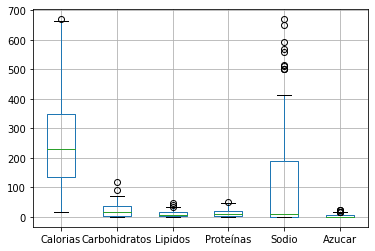

In [ ]:
df_cleaned.boxplot()

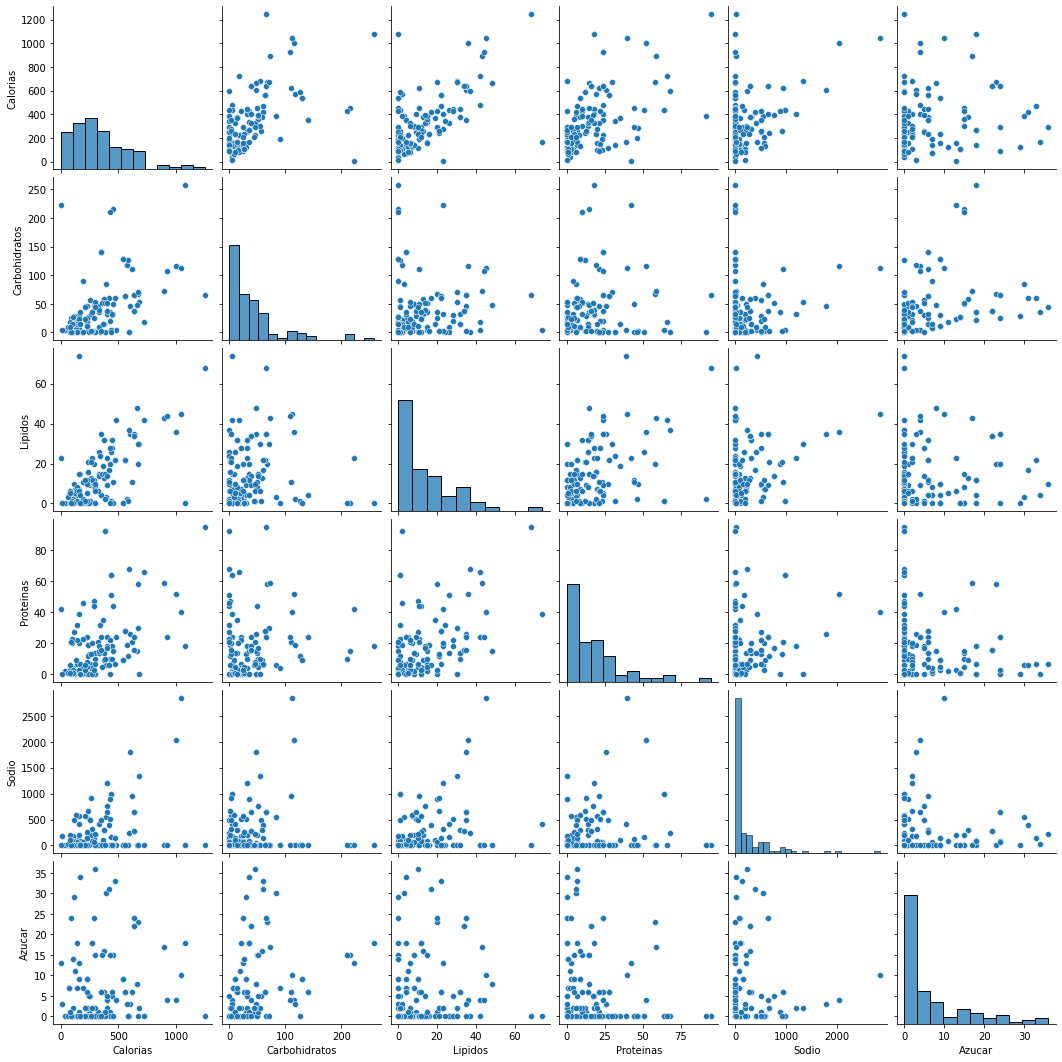

In [9]:
import seaborn as sns
sns.pairplot(df_raw)


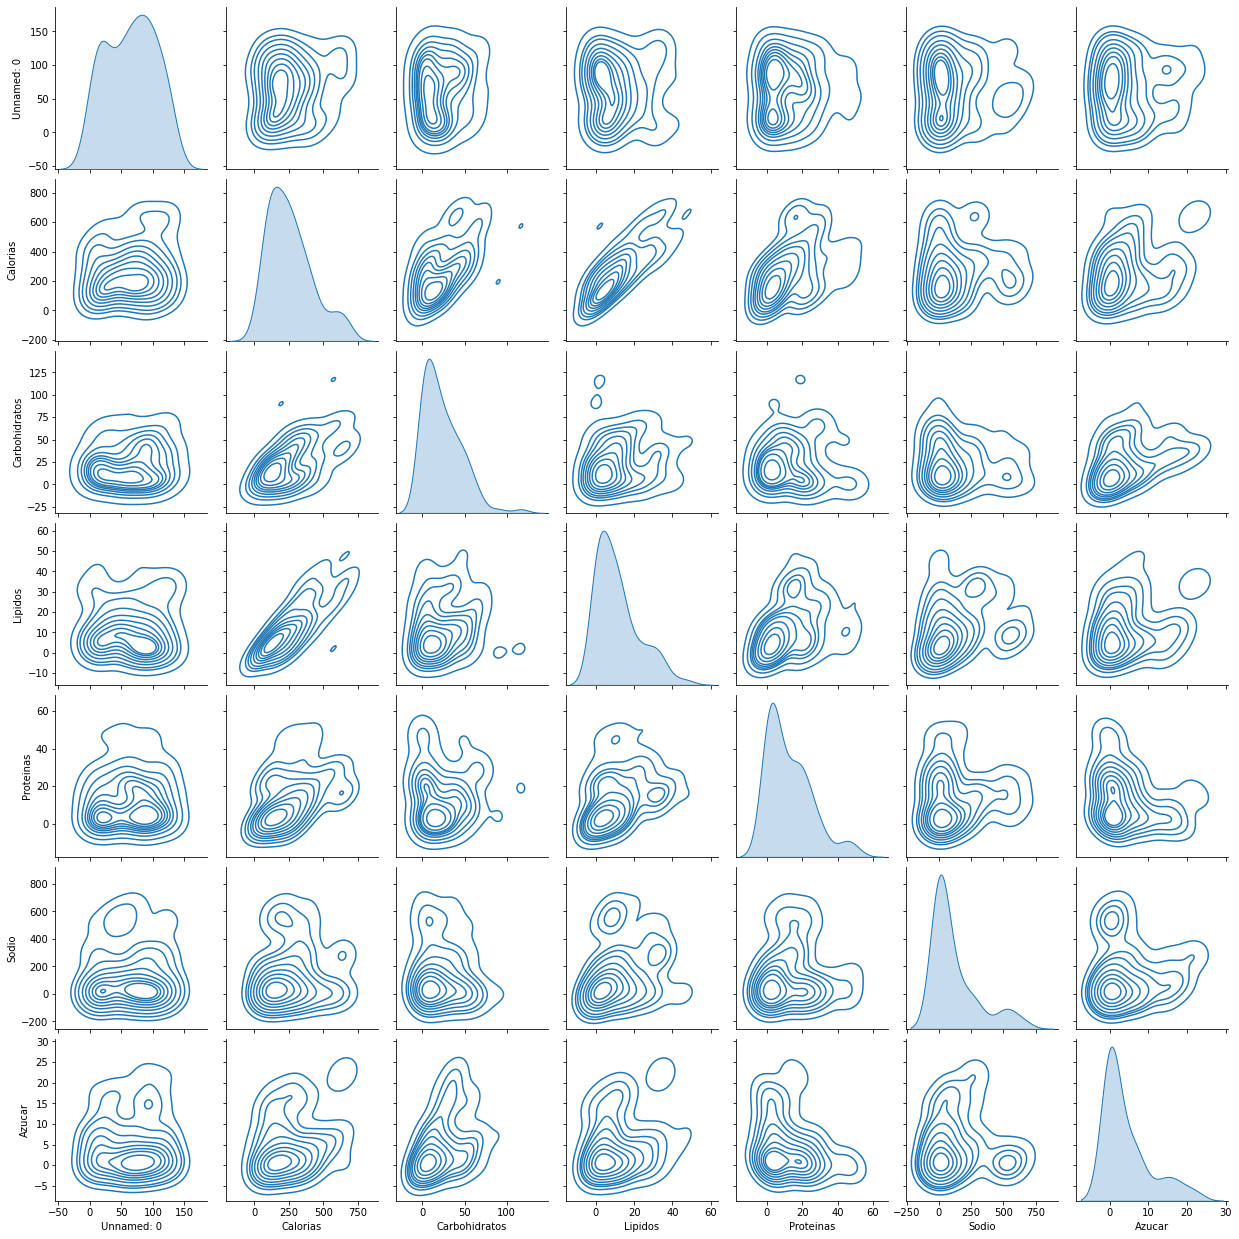

In [10]:
df_cleam=pd.read_csv("/content/ModeloRegresionCleaned.csv")
sns.pairplot(df_cleam, kind="kde")

